# Task 01:-Prediction using supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Check Missing Values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

# From above data the dependant feature is Scores
# independant feature is Hours

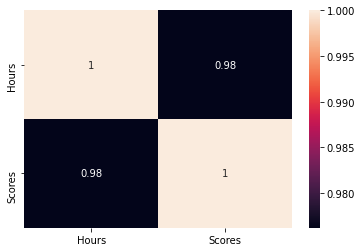

In [7]:
#check the corelation between dependant and independant feature
corr1=df.corr()
sns.heatmap(corr1,annot=True)

# From above corelation matrix we see that scores and Hours features are stongly corelated

# Check for outliers;If there are outliers handle them

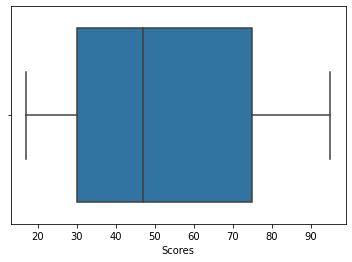

In [8]:
sns.boxplot(df['Scores'])

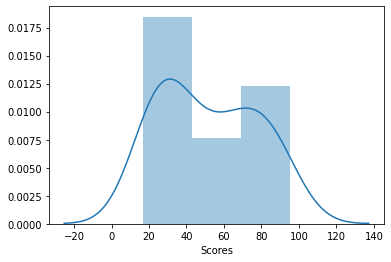

In [9]:
sns.distplot(df['Scores'])

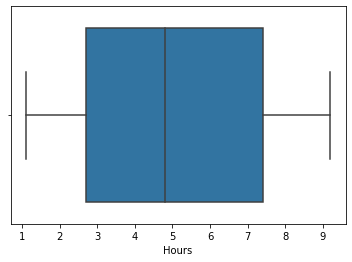

In [10]:
sns.boxplot(df['Hours'])

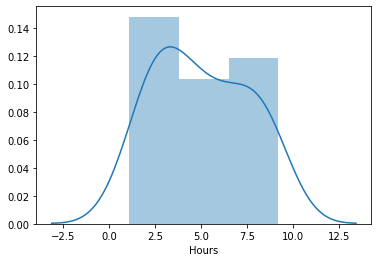

In [11]:
sns.distplot(df['Hours'])

# Our fortune is that there are no outliers

# Now determine X and y as our independant and dependant features respectively

In [12]:
X=df.drop(['Hours'],axis=1)
X.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [13]:
y=df['Hours']
y.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

# Now split X and y

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20)

# Now apply linear regression algorithem

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg

LinearRegression()

In [16]:
#fit the model
reg.fit(X_train,y_train)


LinearRegression()

In [17]:
print(X_test)

    Scores
5       20
2       27
19      69
16      30
11      62


In [18]:
print(y_test)

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
Name: Hours, dtype: float64


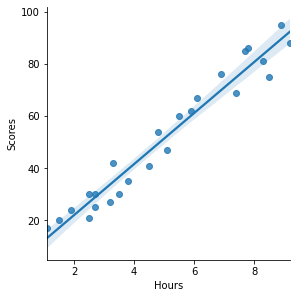

In [19]:
sns.pairplot(df,x_vars="Hours",y_vars='Scores',kind='reg',height=4)

In [20]:
y_pred=reg.predict(X_test)
y_pred

array([1.98036135, 2.65245179, 6.68499445, 2.94049055, 6.01290401])

In [23]:
from sklearn.metrics import mean_squared_error

In [27]:
print(mean_squared_error(y_test,y_pred,multioutput='raw_values'))

[0.24971365]


# From RMS value we see that it lies between 0.2 and 0.5 that means our model can predict data more  accurately

In [28]:
print(reg.score(X_test,y_test)*100)

94.85338729825948
